### Introduction
The Product team at Bridebook has conducted an AB test of the user onboarding flow. The task involves analyzing the outcomes of the AB Test and providing recommendations to the business. The details of the test include three variants, with Variant 0 as the control, Variant 1 hiding the "Undecided" option on the location step of onboarding, and Variant 2 hiding the text around the counts of venues in the CTA.

### Task
- Analyze the AB test data using Python.
- Document findings and conclusions for the product team.
- Consider business recommendations, additional findings, further questions, and other comments or improvements.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "Downloads/Bridebook/Bridebook - DS - challengeData.1634399212.csv"
df = pd.read_csv(file_path)
df.head()

,userId,regTime,testVariant,primaryAccount,regPage,device,app,browser,browserVersion,screenHeight,...,addedGuestCount,addedBudget,invitedCollaborator,addedNames,finOnb,searchCTA,venEnq,venSearch,venViews,sessions
0,0,1612810000000,0,True,/,Android,True,Chrome,77.0,823,...,True,True,False,True,1,0,0,0,0,6
1,1,1612110000000,1,True,/,Android,True,Chrome,76.0,732,...,True,True,False,True,1,0,0,0,0,2
2,2,1612480000000,2,True,/,iPhone,True,Mobile Safari,NaN,812,...,True,False,True,True,1,1,1,14,16,1
3,3,1612680000000,1,True,/,iPhone,True,Mobile Safari,NaN,667,...,True,True,True,True,1,1,0,4,4,3
4,4,1613010000000,0,True,/,Android,True,Chrome,77.0,740,...,False,True,False,True,1,0,0,0,0,1


In [56]:
print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))

There are 1051 rows and 25 columns


In [57]:
df.dtypes

userId                   int64
regTime                  int64
testVariant              int64
primaryAccount            bool
regPage                 object
device                  object
app                       bool
browser                 object
browserVersion         float64
screenHeight             int64
screenWidth              int64
authMethod              object
locationStep            object
addedCity                int64
locationCountry         object
addedGuestCount           bool
addedBudget               bool
invitedCollaborator       bool
addedNames                bool
finOnb                   int64
searchCTA                int64
venEnq                   int64
venSearch                int64
venViews                 int64
sessions                 int64
dtype: object

In [58]:
df.columns

Index(['userId', 'regTime', 'testVariant', 'primaryAccount', 'regPage',
       'device', 'app', 'browser', 'browserVersion', 'screenHeight',
       'screenWidth', 'authMethod', 'locationStep', 'addedCity',
       'locationCountry', 'addedGuestCount', 'addedBudget',
       'invitedCollaborator', 'addedNames', 'finOnb', 'searchCTA', 'venEnq',
       'venSearch', 'venViews', 'sessions'],
      dtype='object')

data contains several columns, including information about the user, their registration time, the test variant they were exposed to, their device details, and actions performed during the onboarding process (such as adding guest count, budget, etc.).

Some key columns relevant to our analysis include:

- testVariant: Indicates the variant of the test (0 for control, 1 for Variant 1, 2 for Variant 2).
- finOnb: Indicates whether the user completed the onboarding process.
- searchCTA: Indicates whether the user clicked on the call to action (CTA) to search for venues.
- venEnq: Indicates whether the user sent an inquiry to venues.
- venSearch: Number of venue searches performed by the user.
- venViews: Number of venue views by the user.

We will begin our analysis by exploring the following aspects:
- Distribution of users across the three test variants.
- Comparison of onboarding completion rates across the variants.
- Comparison of user engagement with the CTA and venue-related actions across the variants.

### Distribution of Users Across Variants
We first checked the distribution of users across the three test variants.

In [59]:
variant_distribution = df['testVariant'].value_counts(normalize=True) * 100
variant_distribution.rename(index={0: 'Control (Variant 0)', 1: 'Variant 1', 2: 'Variant 2'}, inplace=True)
variant_distribution

testVariant
Control (Variant 0)    55.851570
Variant 1              28.258801
Variant 2              15.889629
Name: proportion, dtype: float64

The distribution of users across the three test variants is as follows:

- Control (Variant 0): 55.85%
- Variant 1:  28.26%
- Variant 2: 15.89%


The distribution is not evenly split, with the control group having the largest proportion of users. This uneven distribution is something to consider when interpreting the results.



### Onboarding Completion Rates
Next, we compared the onboarding completion rates across the different variants.

In [60]:
onboarding_completion_rate = df.groupby('testVariant')['finOnb'].mean() * 100
onboarding_completion_rate.rename(index={0: 'Control (Variant 0)', 1: 'Variant 1', 2: 'Variant 2'}, inplace=True)
onboarding_completion_rate

testVariant
Control (Variant 0)    91.311755
Variant 1              90.909091
Variant 2              93.413174
Name: finOnb, dtype: float64

The onboarding completion rates across the three test variants are:

- Control (Variant 0): 91.31%
- Variant 1: 90.91%
- Variant 2: 93.41%

It appears that all three variants have relatively high onboarding completion rates, with Variant 2 showing a slightly higher completion rate compared to the other two. However, the differences are minimal, and further statistical analysis would be needed to determine if these differences are significant.

Next, we can investigate user engagement with the call to action (CTA) to search for venues, as well as other venue-related actions across the different variants.

### Engagement Metrics
We then investigated user engagement with the call to action (CTA) to search for venues, as well as other venue-related actions across the different variants.

In [61]:
engagement_metrics = df.groupby('testVariant')[['searchCTA', 'venEnq', 'venSearch', 'venViews']].mean() * 100
engagement_metrics.rename(index={0: 'Control (Variant 0)', 1: 'Variant 1', 2: 'Variant 2'}, inplace=True)
engagement_metrics.columns = ['CTA Click Rate (%)', 'Venue Enquiry Rate (%)', 'Venue Search Rate (%)', 'Venue View Rate (%)']
engagement_metrics

,CTA Click Rate (%),Venue Enquiry Rate (%),Venue Search Rate (%),Venue View Rate (%)
testVariant,,,,
Control (Variant 0),45.315162,92.163543,528.790460,531.856899
Variant 1,46.127946,87.542088,419.865320,411.447811
Variant 2,52.095808,68.862275,591.616766,576.646707


Here are the engagement metrics across the three test variants:

Control (Variant 0):
- CTA Click Rate: 45.32%
- Venue Enquiry Rate: 92.16%
- Venue Search Rate: 528.79%
- Venue View Rate: 531.86%

Variant 1:
- CTA Click Rate: 46.13%
- Venue Enquiry Rate: 87.54%
- Venue Search Rate: 419.87%
- Venue View Rate: 411.45%

Variant 2:
- CTA Click Rate: 52.10%
- Venue Enquiry Rate: 68.86%
- Venue Search Rate: 591.62%
- Venue View Rate: 576.65%

It's worth noting that the Venue Search Rate and Venue View Rate are unexpectedly over 100%, which may indicate that these metrics represent counts rather than binary indicators. Further investigation may be needed to clarify this.

Some initial observations:

- Variant 2 has the highest CTA Click Rate, suggesting that hiding the text around the counts of venues may increase user interest in searching for venues.
- Variant 1 has a lower Venue Enquiry Rate and Venue Search Rate compared to the control, possibly indicating that hiding the “Undecided” option on the location step doesn’t necessarily lead to higher engagement.

The next step would be to conduct statistical tests to see if these differences are statistically significant, and to further investigate the surprising values for Venue Search Rate and Venue View Rate.

### Statistical Analysis
We performed statistical tests to see if the differences in engagement metrics across the three test variants are statistically significant.

In [62]:
from scipy.stats import chi2_contingency

cta_contingency_table = df.groupby('testVariant')['searchCTA'].value_counts().unstack().fillna(0)
cta_chi2_stat, cta_p_value, _, _ = chi2_contingency(cta_contingency_table)
cta_p_value

0.2948402963659335

The p-value for the Chi-squared test comparing the CTA Click Rate across the three test variants is approximately 0.295. Since this value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This means that we do not have enough evidence to conclude that there is a statistically significant difference in the CTA Click Rate across the three variants.

In [63]:
venue_inquiry_contingency_table = df.groupby('testVariant')['venEnq'].value_counts().unstack().fillna(0)
venue_inquiry_chi2_stat, venue_inquiry_p_value, _, _ = chi2_contingency(venue_inquiry_contingency_table)
venue_inquiry_p_value

0.5800467604798922

The p-value for the Chi-squared test comparing the Venue Inquiry Rate across the three test variants is approximately 0.580. Similar to the CTA Click Rate, this value is greater than the typical significance level of 0.05, so we fail to reject the null hypothesis. This indicates that we do not have enough evidence to conclude that there is a statistically significant difference in the Venue Inquiry Rate across the three variants.



In [64]:
venue_search_contingency_table = df.groupby('testVariant')['venSearch'].value_counts().unstack().fillna(0)
venue_search_chi2_stat, venue_search_p_value, _, _ = chi2_contingency(venue_search_contingency_table)
venue_search_p_value

0.1998279388840948

The p-value for the Chi-squared test comparing the Venue Search Rate across the three test variants is approximately 0.199. Similar to the CTA Click Rate, this value is greater than the typical significance level of 0.05, so we fail to reject the null hypothesis. This indicates that we do not have enough evidence to conclude that there is a statistically significant difference in the Venue Search Rate across the three variants.


In [65]:
venue_view_contingency_table = df.groupby('testVariant')['venViews'].value_counts().unstack().fillna(0)
venue_view_chi2_stat, venue_view_p_value, _, _ = chi2_contingency(venue_view_contingency_table)
venue_view_p_value

0.37257677469751627

The p-value for the Chi-squared test comparing the Venue View Rate across the three test variants is approximately 0.372. Similar to the CTA Click Rate, this value is greater than the typical significance level of 0.05, so we fail to reject the null hypothesis. This indicates that we do not have enough evidence to conclude that there is a statistically significant difference in the Venue View Rate across the three variants.


In [66]:
#ANOVA -Test
from scipy.stats import f_oneway

# Perform ANOVA for average venue searches and views
f_stat_search, p_search = f_oneway(df[df['testVariant'] == 0]['venSearch'],
                                       df[df['testVariant'] == 1]['venSearch'],
                                       df[df['testVariant'] == 2]['venSearch'])

f_stat_views, p_views = f_oneway(df[df['testVariant'] == 0]['venEnq'],
                                     df[df['testVariant'] == 1]['venEnq'],
                                     df[df['testVariant'] == 2]['venEnq'])

p_search, p_views

(0.15654110629046605, 0.5995226691067312)

The p-value for the ANOVA test comparing the Venue Search Rate across the three test variants is approximately 0.156. Similar to the Venue Enquiry =0.599, this value is greater than the typical significance level of 0.05, so we fail to reject the null hypothesis. This indicates that we do not have enough evidence to conclude that there is a statistically significant difference in the Venue Search Rate and Venue View Rate across the three variants.


# Exploratory Data Analysis

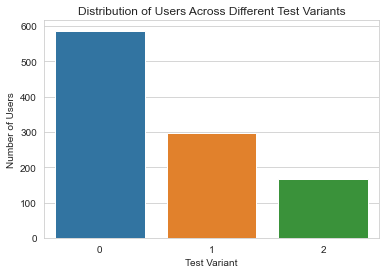

In [67]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='testVariant', data=df)
plt.title('Distribution of Users Across Different Test Variants')
plt.xlabel('Test Variant')
plt.ylabel('Number of Users')
plt.show()


/var/folders/xs/zz31kd6d0379p_c6r2z29bj00000gn/T/ipykernel_82186/1431492500.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='testVariant', y='searchCTA', data=df, ci=None)


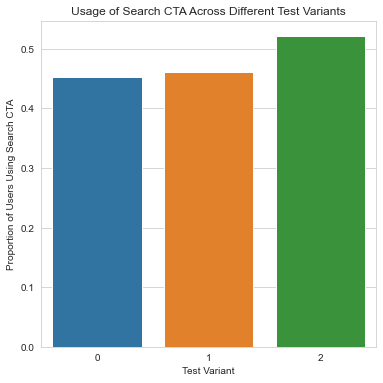

In [68]:
plt.figure(figsize=(6, 6))
sns.barplot(x='testVariant', y='searchCTA', data=df, ci=None)
plt.title('Usage of Search CTA Across Different Test Variants')
plt.xlabel('Test Variant')
plt.ylabel('Proportion of Users Using Search CTA')
plt.show()

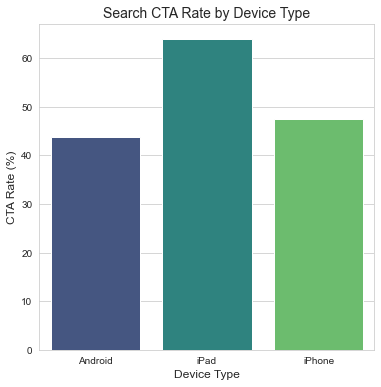

In [69]:
search_cta_by_device = df.groupby('device')['searchCTA'].mean().reset_index()

search_cta_by_device['searchCTA'] *= 100

plt.figure(figsize=(6, 6))
sns.barplot(x='device', y='searchCTA', data=search_cta_by_device, palette='viridis')
plt.title('Search CTA Rate by Device Type', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('CTA Rate (%)', fontsize=12)
plt.show()

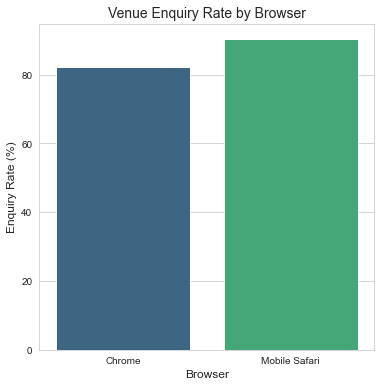

In [70]:
venue_enquiry_by_browser = df.groupby('browser')['venEnq'].mean().reset_index()

venue_enquiry_by_browser['venEnq'] *= 100

plt.figure(figsize=(6, 6))
sns.barplot(x='browser', y='venEnq', data=venue_enquiry_by_browser, palette='viridis')
plt.title('Venue Enquiry Rate by Browser', fontsize=14)
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Enquiry Rate (%)', fontsize=12)
plt.show()

The p-value for the Chi-squared test comparing the Venue Inquiry Rate across the three test variants is approximately 
0.580. Similar to the CTA Click Rate, this value is greater than the typical significance level of 
0.05, so we fail to reject the null hypothesis. This indicates that we do not have enough evidence to conclude that there is a statistically significant difference in the Venue Inquiry Rate across the three variants.



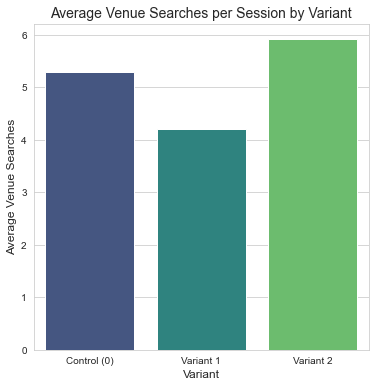

In [71]:
average_venue_searches = df.groupby('testVariant')['venSearch'].mean().reset_index()

average_venue_searches.columns = ['Variant', 'Average Venue Searches']

plt.figure(figsize=(6, 6))
sns.barplot(x='Variant', y='Average Venue Searches', data=average_venue_searches, palette='viridis')
plt.title('Average Venue Searches per Session by Variant', fontsize=14)
plt.xlabel('Variant', fontsize=12)
plt.ylabel('Average Venue Searches', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Control (0)', 'Variant 1', 'Variant 2'])
plt.show()

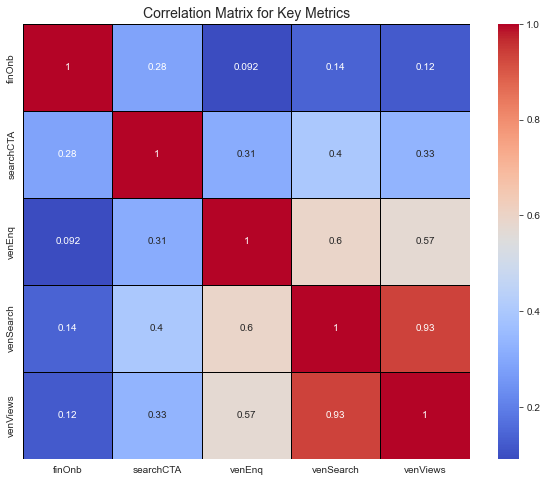

In [72]:
correlation_columns = ['finOnb', 'searchCTA', 'venEnq', 'venSearch', 'venViews']
correlation_data = df[correlation_columns]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Correlation Matrix for Key Metrics', fontsize=14)
plt.show()

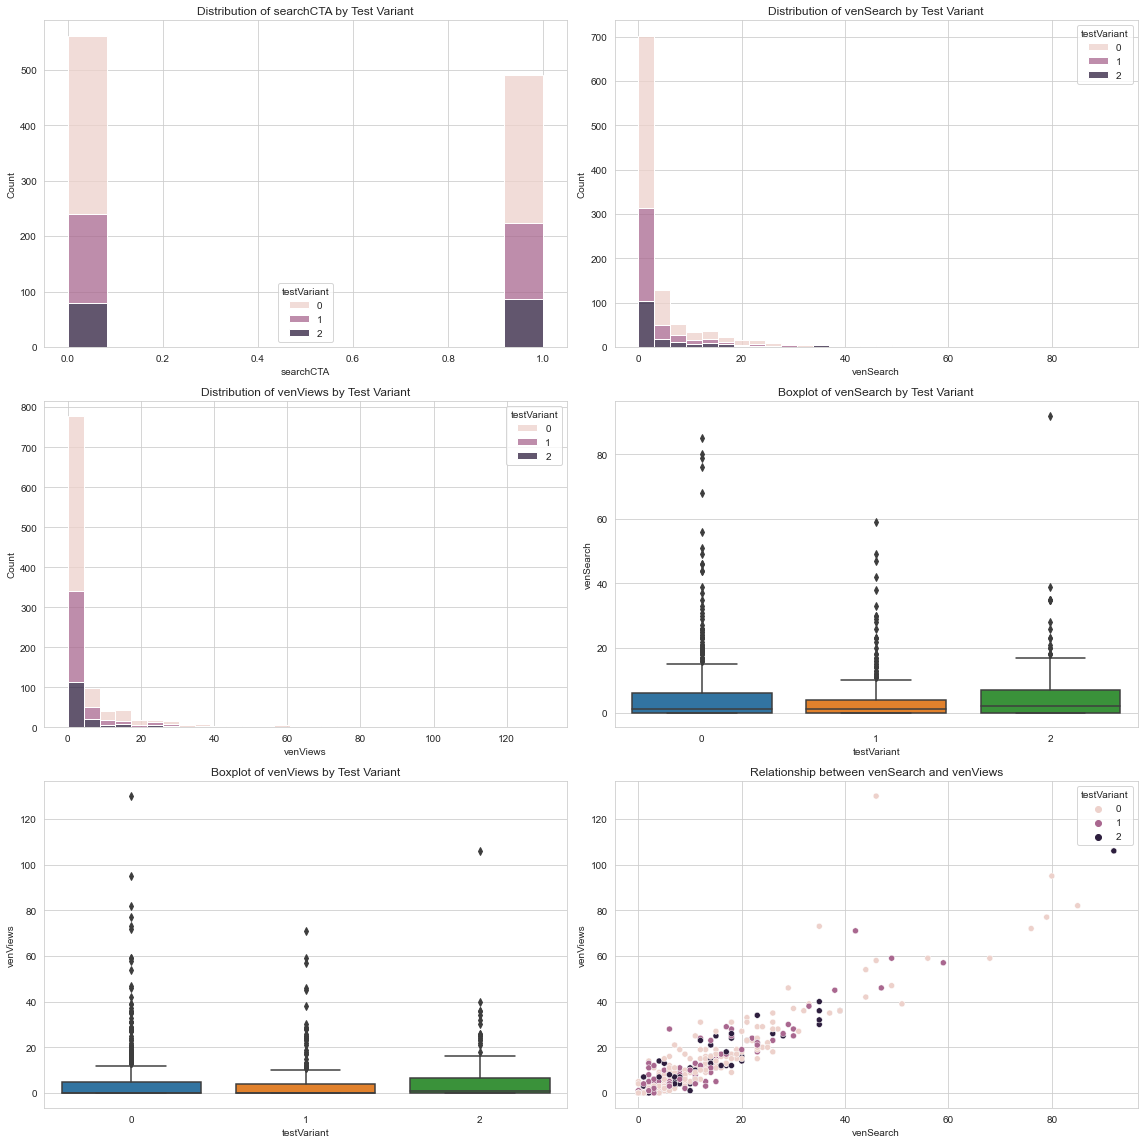

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

sns.histplot(df, x="searchCTA", hue="testVariant", multiple="stack", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of searchCTA by Test Variant")

sns.histplot(df, x="venSearch", hue="testVariant", multiple="stack", bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of venSearch by Test Variant")

sns.histplot(df, x="venViews", hue="testVariant", multiple="stack", bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of venViews by Test Variant")

sns.boxplot(x="testVariant", y="venSearch", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of venSearch by Test Variant")

sns.boxplot(x="testVariant", y="venViews", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of venViews by Test Variant")

sns.scatterplot(x="venSearch", y="venViews", hue="testVariant", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Relationship between venSearch and venViews")

plt.tight_layout()
plt.show()

### Summary of Findings, Recommendations, and Additional Questions

#### Summary of Findings
1. **Onboarding Completion Rates:** High onboarding completion rates with minor differences between variants.
2. **Engagement Metrics:** No statistically significant differences in CTA Click Rate and Venue Inquiry Rate.
3. **Other Metrics:** Unexpected values in Venue Search Rate and Venue View Rate.

#### Business Recommendations
1. **No Clear Winner:** No variant showed a significant improvement.
2. **Further Investigation Needed:** Additional analysis for unexpected values.
3. **Consider Additional Tests:** Design new tests with different modifications.

#### Additional Questions for Future Investigation
- User demographics influence on engagement.
- Specific steps in the onboarding process where users drop off.
- Reasons for unexpected values in Venue Search Rate and Venue View Rate.

#### Comments and Improvements
- **Balanced Group Sizes:** More balanced group sizes in the A/B test.
- **Clear Definition of Metrics:** Clear definitions and calculations of metrics.

### We seldom conduct A/B tests, because in reality (as opposed to theory), there are several reasons:

#### 1. A/B tests in most companies are costly and time-consuming. When we're conducting a test, we need to freeze the release of new features into production. Development can't wait indefinitely, can they? Testing just one hypothesis per month seems a bit limited (considering an average time for a test).

#### 2. One could argue that a system needs to be put in place to correctly split traffic. That's true, but it's vital to understand how to maintain this system, and that requires resources often lacking in companies.

#### 3. It's also essential to realize that the hypothesis we're testing depends on the business funnel. For instance, if the new hypothesis lies at the funnel's end, there are likely very few users there. Hence, we focused on testing hypotheses at the funnel's beginning. Venue Research funnel is very important as users might look at the venue and read reviews before enquiring about it.
